# Import Dependencies

We begin by importing the necessary libraries.

In [1]:
# System & OS
import os

# Data analysis
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

# ML
from sklearn.cluster import KMeans

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style('white')

# Reproducibility

Set the seed to ensure our results are reproducible.

In [2]:
def set_seed(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

SEED = 11
set_seed(SEED)

# Data Cleaning

Next, read in the `Pitching` dataframe from the `Lahman` package. Note, a separate R script was used to export the data into a CSV file.

In [3]:
# Read data & drop irrelevant columns
df = pd.read_csv('../data/pitching_df.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

# Display results
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


Apply the following cleaning steps:

- only consider entries from the past 12 seasons (since 2010)
- only consider entries with more than 20 games played 
- select the following features: `W`, `L`, `G`, `GS`, `SV`

In [4]:
# Filter rows with year >= 2010 and games played >= 20
df = df[(df['yearID'] >= 2010) & (df['G'] >= 20)].reset_index(drop=True)

# Use only the specified features
df = df[['W', 'L', 'G', 'GS', 'SV']]

# Display results' dimensions
df.shape

(4697, 5)

# K-Means Clustering

It remains to perform k-means clustering on the dataframe. After testing a couple different values of `k` off-screen, we'll opt for `k=4` clusters. Note, the model is fit to the dataframe as is, while the scatterplot is visualized by aggregating `W` and `L` into one of the coordinate axes `win_loss = W + L`.

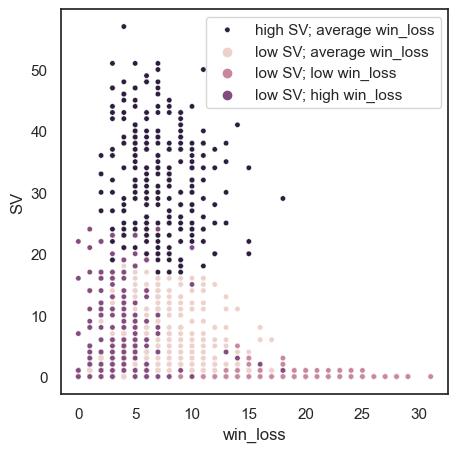

In [5]:
# Create figure
fig, ax = plt.subplots(figsize=(5, 5))
# Fit the k-means clustering model to df
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=SEED).fit(df)
# Extract cluster labels
df['cluster'] = kmeans.labels_
# Create x-axis
df['win_loss'] = df['W'] + df['L']
# Create scatter plot
sns.scatterplot(data=df, x='win_loss', y='SV', hue='cluster', s=15)
# Create legend
ax.legend(['high SV; average win_loss', 'low SV; average win_loss', 'low SV; low win_loss', 'low SV; high win_loss'])
# Display results
plt.show()

As we can see, the model does a fairly good job at identifying 4 distinct clusters in the data. The low `SV` high `win_loss` cluster likely represents starting pitchers; high `SV` average `win_loss` likely represents closers; etc. With our limited understanding of baseball, that's about as far as we're able to interpret the results, though an individual with a more insightful knowledge base on the subject may be able to decipher these results further. 